# Time Series Week 9 - Assignment

## 1. Import Module and Load Data

### 1.1. Import Necessary Libraries
**Task:** Import the necessary libraries for time series analysis, including pmdarima for ARIMA modeling.

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.graphics.tsaplots import plot_ccf
from sklearn.model_selection import train_test_split
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ValueWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels.tsa.statespace.sarimax")

### 1.2. Load Data
**Task:** Load a time series dataset

In [54]:
data = pd.read_excel('/content/drive/Shareddrives/timeseries-datasets/tourism_hotel_data.xlsx')
data.head(5)

,Date,room_occupancy,tourists_visits,bookings
0,2015-02-01,4.284238,109.138510,5.740200
1,2015-03-01,5.076643,110.314902,4.057420
2,2015-04-01,6.485190,119.297602,5.939756
3,2015-05-01,8.409982,110.749549,6.041525
4,2015-06-01,7.091650,108.048256,8.795881


## 2. Data Inspection and Visualization

### 2.1. Inspect the columns
**Task:** Inspect the columns and visualize the dataset

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             59 non-null     datetime64[ns]
 1   room_occupancy   59 non-null     float64       
 2   tourists_visits  59 non-null     float64       
 3   bookings         59 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 KB


In [56]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

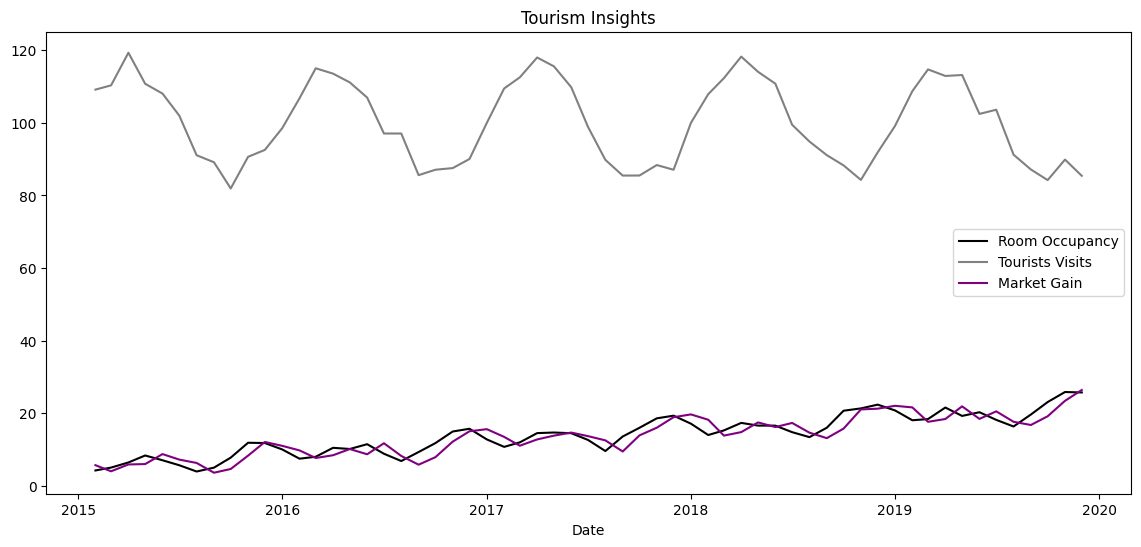

In [57]:
plt.figure(figsize=(14, 6))

# Replace column names and colors with actual values
plt.plot(data['room_occupancy'], label='Room Occupancy', color='black')
plt.plot(data['tourists_visits'], label='Tourists Visits', color='grey')
plt.plot(data['bookings'], label='Market Gain', color='purple')

plt.legend()
plt.title('Tourism Insights')
plt.xlabel('Date')
plt.show()

## 3. Test for Stationarity

### 3.1. Perform ADF
**Task:** Check stationarity for all the variables in the dataset

In [58]:
def adf_test(series):
    result = sm.tsa.adfuller(series)
    print(f'ADF Statistic: {result[0]:.2f}')
    print(f'p-value: {result[1]:.2f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.2f}')

In [59]:
print("ADF Test for Tourists Visits")
print("===========================")
adf_test(data['tourists_visits'])

ADF Test for Tourists Visits
ADF Statistic: -6.27
p-value: 0.00
Critical Values:
   1%: -3.56
   5%: -2.92
   10%: -2.60


In [60]:
print("ADF Test for Room Occupancy")
print("===========================")
adf_test(data['room_occupancy'])

ADF Test for Room Occupancy
ADF Statistic: -0.28
p-value: 0.93
Critical Values:
   1%: -3.58
   5%: -2.93
   10%: -2.60


In [61]:
print("ADF Test for Bookings")
print("===========================")
adf_test(data['bookings'])

ADF Test for Bookings
ADF Statistic: -0.02
p-value: 0.96
Critical Values:
   1%: -3.58
   5%: -2.93
   10%: -2.60


## 4. Test for Causality

### 4.1 Perform Granger Causality Tests
**Task:** Check for causality between Room Occupancy(target variables) and other variables in the dataset

In [62]:
# Test if advertising_expenditure Granger-causes market_gain
print("\nGranger Causality Test: Tourists Visits -> Room Occupancy")
granger_test_1a = grangercausalitytests(data[['tourists_visits', 'room_occupancy']], maxlag=2)
print("=====================================================================================")

# Test if market_gain Granger-causes advertising_expenditure
print("\nGranger Causality Test: Room Occupancy -> Tourists Visits")
granger_test_1b = grangercausalitytests(data[['room_occupancy', 'tourists_visits']], maxlag=2)


Granger Causality Test: Tourists Visits -> Room Occupancy

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4580  , p=0.5014  , df_denom=55, df_num=1
ssr based chi2 test:   chi2=0.4829  , p=0.4871  , df=1
likelihood ratio test: chi2=0.4809  , p=0.4880  , df=1
parameter F test:         F=0.4580  , p=0.5014  , df_denom=55, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0616  , p=0.9403  , df_denom=52, df_num=2
ssr based chi2 test:   chi2=0.1351  , p=0.9347  , df=2
likelihood ratio test: chi2=0.1349  , p=0.9348  , df=2
parameter F test:         F=0.0616  , p=0.9403  , df_denom=52, df_num=2

Granger Causality Test: Room Occupancy -> Tourists Visits

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2726  , p=0.0435  , df_denom=55, df_num=1
ssr based chi2 test:   chi2=4.5056  , p=0.0338  , df=1
likelihood ratio test: chi2=4.3392  , p=0.0372  , df=1
parameter F test:         F=4.2726  , p=0.0435  , df_d

In [63]:
# Test if market_gain Granger-causes advertising_expenditure
print("\nGranger Causality Test: Room Occupancy -> Bookings")
granger_test_1b = grangercausalitytests(data[['bookings', 'room_occupancy']], maxlag=2)
print("=====================================================================================")

# Test if advertising_expenditure Granger-causes market_gain
print("\nGranger Causality Test: Bookings -> Room Occupancy")
granger_test_1a = grangercausalitytests(data[['room_occupancy', 'bookings']], maxlag=2)
print("=====================================================================================")


Granger Causality Test: Room Occupancy -> Bookings

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1055.1306, p=0.0000  , df_denom=55, df_num=1
ssr based chi2 test:   chi2=1112.6832, p=0.0000  , df=1
likelihood ratio test: chi2=174.2842, p=0.0000  , df=1
parameter F test:         F=1055.1306, p=0.0000  , df_denom=55, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=478.2818, p=0.0000  , df_denom=52, df_num=2
ssr based chi2 test:   chi2=1048.5408, p=0.0000  , df=2
likelihood ratio test: chi2=169.0072, p=0.0000  , df=2
parameter F test:         F=478.2818, p=0.0000  , df_denom=52, df_num=2

Granger Causality Test: Bookings -> Room Occupancy

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3702  , p=0.0242  , df_denom=55, df_num=1
ssr based chi2 test:   chi2=5.6631  , p=0.0173  , df=1
likelihood ratio test: chi2=5.4034  , p=0.0201  , df=1
parameter F test:         F=5.3702  , p=0.0242  , df_denom=55, d

## 5. Train-Test Split
**Task:** Split the data into train and test set. Define the exogenous variable(s).

In [64]:
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)
train_exog = train_data[['tourists_visits']]
test_exog = test_data[['tourists_visits']]

## 6. ARIMAX

### 6.1. Modelling
**Task:** Find the optimal model to use

In [65]:
# Define the p, d, and q parameters
p = range(0, 3)
d = range(0, 3)
q = range(0, 3)

# Generate combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

# DataFrame to store results
results = []

# Grid search over ARIMAX parameters
for param in pdq:
    try:
        # Fit ARIMAX model with exogenous variable(s) (e.g., exog=train_exog)
        temp_model = ARIMA(train_data['room_occupancy'], order=param, exog=train_exog)
        temp_result = temp_model.fit()

        # Store parameters and AIC
        results.append([param, temp_result.aic])
    except Exception as e:
        continue

# Convert results to DataFrame and sort by AIC
results_df = pd.DataFrame(results, columns=['parameters', 'AIC'])
results_df = results_df.sort_values(by='AIC').reset_index(drop=True)

print("Optimal ARIMAX parameters and AIC values:")
print(results_df)

Optimal ARIMAX parameters and AIC values:
   parameters         AIC
0   (2, 1, 2)  168.584070
1   (2, 2, 2)  180.592671
2   (2, 1, 1)  188.661763
3   (2, 1, 0)  193.458659
4   (2, 2, 1)  194.231406
5   (1, 1, 2)  196.492389
6   (0, 1, 1)  197.009103
7   (0, 2, 2)  197.905853
8   (0, 1, 2)  198.054137
9   (1, 1, 1)  198.823612
10  (1, 2, 2)  199.699371
11  (1, 1, 0)  201.210270
12  (1, 2, 1)  202.169439
13  (0, 1, 0)  204.215816
14  (0, 2, 1)  205.121764
15  (1, 0, 1)  205.168562
16  (2, 0, 2)  206.776698
17  (1, 0, 2)  207.059082
18  (2, 0, 1)  207.117569
19  (2, 0, 0)  208.343730
20  (2, 2, 0)  213.509285
21  (1, 0, 0)  213.762324
22  (0, 2, 0)  214.201364
23  (1, 2, 0)  216.112898
24  (0, 0, 2)  220.974182
25  (0, 0, 1)  238.932303
26  (0, 0, 0)  281.495930


### 6.2. Model training
**Task:** Fit the model and print the summary

In [66]:
# Define and fit the ARIMAX model
arimax_model = ARIMA(train_data['room_occupancy'], order=(2, 1, 2), exog=train_exog)
arimax_fit = arimax_model.fit()
print(arimax_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         room_occupancy   No. Observations:                   47
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -78.292
Date:                Tue, 05 Nov 2024   AIC                            168.584
Time:                        05:02:59   BIC                            179.556
Sample:                    02-01-2015   HQIC                           172.694
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
tourists_visits    -0.0163      0.033     -0.488      0.626      -0.082       0.049
ar.L1               0.9859      0.025     39.420      0.000       0.937       1.035
ar.L2              -0.9998      

### 6.3. Model Forecasting
**Task:** Perform forecasting with ARIMAX and plot the graph

In [68]:
forecast_steps = len(test_data)
arimax_forecast = arimax_fit.get_forecast(steps=forecast_steps, exog=test_exog)
arimax_forecast_mean = arimax_forecast.predicted_mean
arimax_conf_int = arimax_forecast.conf_int()

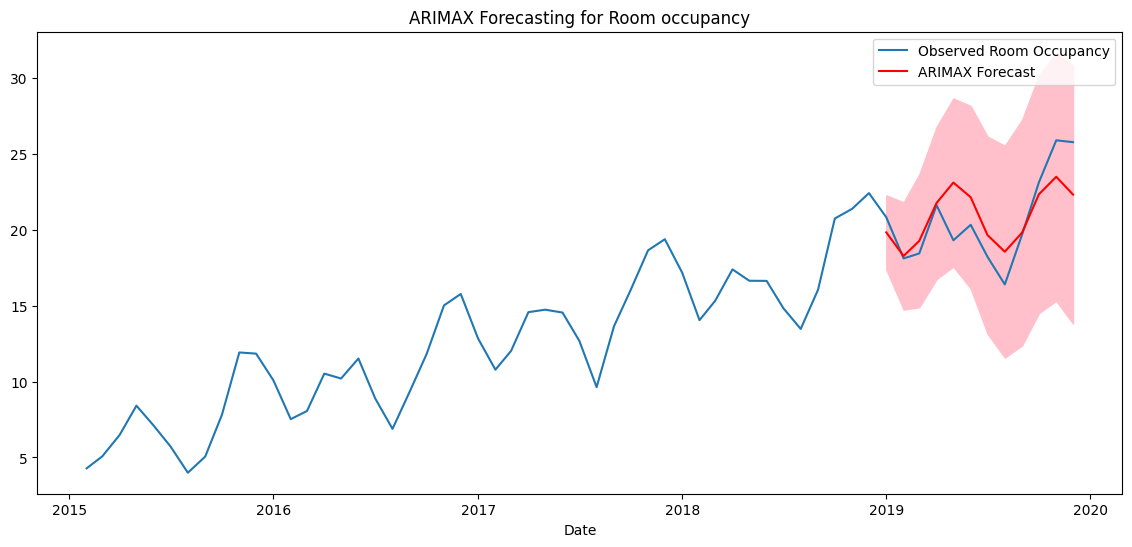

In [69]:
# Plot ARIMAX forecast
plt.figure(figsize=(14, 6))
plt.plot(data['room_occupancy'], label='Observed Room Occupancy')
plt.plot(arimax_forecast_mean, color='red', label='ARIMAX Forecast')
plt.fill_between(arimax_conf_int.index,
                 arimax_conf_int.iloc[:, 0],
                 arimax_conf_int.iloc[:, 1], color='pink')
plt.legend()
plt.title('ARIMAX Forecasting for Room occupancy')
plt.xlabel('Date')
plt.show()

## 7. SARIMAX

### 7.1. Modelling
**Task:** Find the optimal model to use

In [48]:
# Define the p, d, q parameters for the regular ARIMA part
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))

# Define the P, D, Q parameters for the seasonal part and try two seasonal periods
P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
seasonal_periods = [12]

# DataFrame to store results
results = []

# Grid search over SARIMAX parameters with multiple seasonal periods
for param in pdq:
    for seasonal_m in seasonal_periods:
        seasonal_pdq = [(x[0], x[1], x[2], seasonal_m) for x in itertools.product(P, D, Q)]
        for seasonal_param in seasonal_pdq:
            try:
                # Fit SARIMAX model with exogenous variable(s) (e.g., exog=train_exog)
                temp_model = SARIMAX(train_data['room_occupancy'],
                                     order=param,
                                     seasonal_order=seasonal_param,
                                     exog=train_exog)
                temp_result = temp_model.fit(disp=False)  # disp=False suppresses output

                # Store parameters and AIC
                results.append([param, seasonal_param, temp_result.aic])
            except Exception as e:
                continue

# Convert results to DataFrame and sort by AIC
results_df = pd.DataFrame(results, columns=['SARIMAX parameters', 'Seasonal parameters', 'AIC'])
results_df = results_df.sort_values(by='AIC').reset_index(drop=True)

print("Optimal SARIMAX parameters and AIC values:")
print(results_df)

Optimal SARIMAX parameters and AIC values:
   SARIMAX parameters Seasonal parameters         AIC
0           (0, 1, 1)       (0, 1, 0, 12)   89.356178
1           (0, 1, 1)       (1, 1, 0, 12)   90.024494
2           (0, 1, 1)       (0, 1, 1, 12)   90.315944
3           (1, 1, 1)       (0, 1, 0, 12)   90.611797
4           (0, 1, 1)       (1, 1, 1, 12)   91.502125
..                ...                 ...         ...
59          (0, 0, 1)       (0, 0, 0, 12)  245.594403
60          (0, 0, 0)       (1, 0, 1, 12)  247.375016
61          (0, 0, 0)       (1, 0, 0, 12)  264.631541
62          (0, 0, 0)       (0, 0, 1, 12)  268.043929
63          (0, 0, 0)       (0, 0, 0, 12)  290.293426

[64 rows x 3 columns]


### 7.2. Model Training
**Task:** Fit the model and print the summary

In [49]:
# Define the SARIMAX parameters
order = (0, 1, 1)
seasonal_order = (0, 1, 0, 12)

# Fit the SARIMAX model with exogenous variables if available (e.g., exog=train_exog)
sarimax_model = SARIMAX(train_data['room_occupancy'], order=order, seasonal_order=seasonal_order, exog=train_exog)
sarimax_fit = sarimax_model.fit()

# Print the summary of the fitted model
print(sarimax_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                      room_occupancy   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 -41.678
Date:                             Tue, 05 Nov 2024   AIC                             89.356
Time:                                     05:00:39   BIC                             93.935
Sample:                                 02-01-2015   HQIC                            90.918
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
tourists_visits     0.0051      0.049      0.104      0.917      -0.091       0.101
ma.L1       

### 7.3. Model Forecasting
**Task:** Perform SARIMAX and plot the graph

In [50]:
# Forecasting with SARIMAX
sarimax_forecast = sarimax_fit.get_forecast(steps=forecast_steps, exog=test_exog)
sarimax_forecast_mean = sarimax_forecast.predicted_mean
sarimax_conf_int = sarimax_forecast.conf_int()

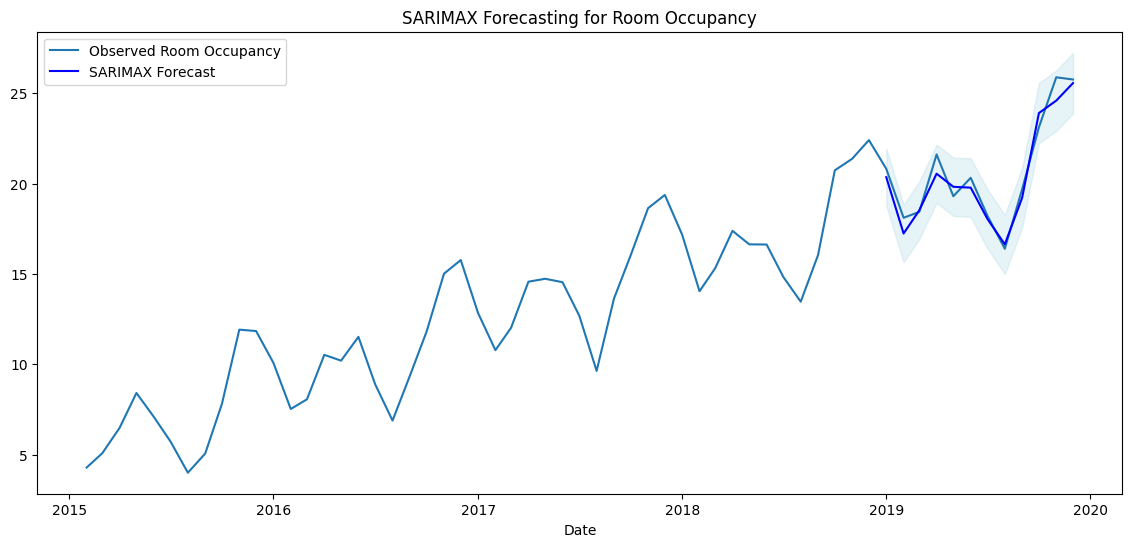

In [51]:
# Plot SARIMAX forecast
plt.figure(figsize=(14, 6))
plt.plot(data['room_occupancy'], label='Observed Room Occupancy')
plt.plot(sarimax_forecast_mean, color='blue', label='SARIMAX Forecast')
plt.fill_between(sarimax_conf_int.index,
                 sarimax_conf_int.iloc[:, 0],
                 sarimax_conf_int.iloc[:, 1], color='lightblue', alpha=0.3)
plt.legend()
plt.title('SARIMAX Forecasting for Room Occupancy')
plt.xlabel('Date')
plt.show()